In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

from imageio import imread

In [17]:
MODEL = "0110"

# Ws = 100
# We = 200
# Hs = 40
# He = 260

Ws = 80
We = 220
Hs = 0
He = 290

im_fn = '/exterior.png'

config_fn = "/home/marsdenlab/projects/\
seg_regression/scripts/config_segment/"+MODEL+"/configs/"+MODEL+"_pca.json"

cfg = io.load_json(config_fn)

pca_dirs = cfg['PCA_DIRS']
mean_dir = cfg['PCA_DIRS'][-1]

mean_img = imread(mean_dir+im_fn)[Hs:He,Ws:We,:]

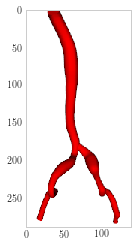

In [18]:
plt.figure()
plt.imshow(mean_img)
plt.grid(False)
plt.show()
plt.close()

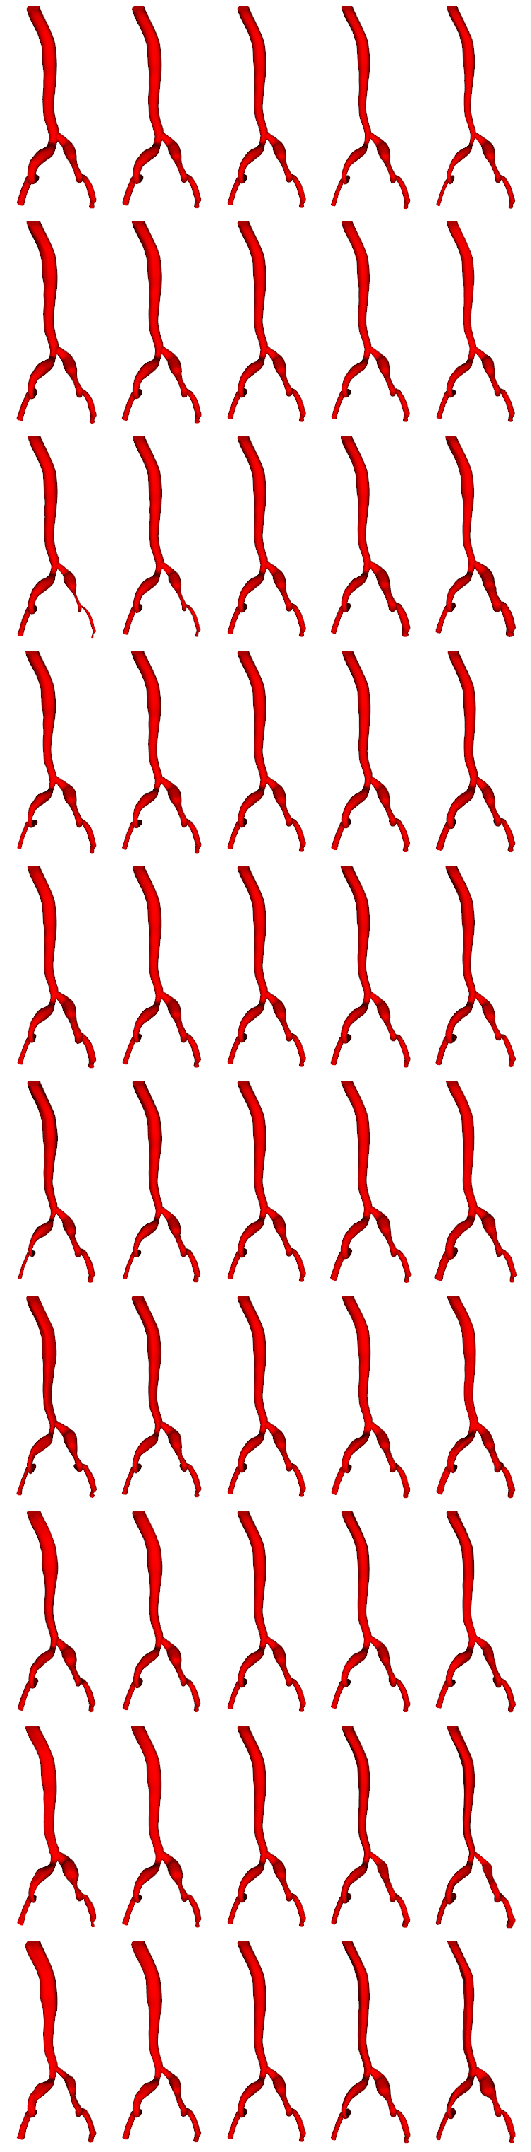

In [19]:
modes  = 10
coeffs = 4

SizeH = 3
SizeW = 1.5
count = 0

f, axarr = plt.subplots(modes, coeffs+1, figsize=((coeffs+1)*SizeW,modes*SizeH))

count = 0
for i in range(modes):
    
    ims = []
    for j in range(4):
        d = pca_dirs[count+j]
        ims.append(imread(d+im_fn)[Hs:He,Ws:We,:])
    
    axarr[i,0].imshow(ims[0])
    axarr[i,1].imshow(ims[1])
    axarr[i,2].imshow(mean_img)
    axarr[i,3].imshow(ims[2])
    axarr[i,4].imshow(ims[3])
    
    
    
    for k in range(5):
        axarr[i,k].grid(False)
        axarr[i,k].set_frame_on(False)
        plt.setp(axarr[i,k].get_xticklabels(), visible=False)
        plt.setp(axarr[i,k].get_yticklabels(), visible=False)
    
    count+= coeffs

plt.tight_layout()
plt.savefig(mean_dir+'/plot.png',dpi=300)
plt.savefig(mean_dir+'/plot.pdf',dpi=200)

plt.show()
plt.close()